# Creating Label Images 

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

This notebook demonstrates how to create a ground truth (label) image using a weakly supervised conditional random field

This is something we can't do in the notebook because it involves interacting with graphics. So, you'll be running this on your laptop 

The script is part of the ```dl_tools``` package. The syntax is:

```python label_1image_crf.py -w 500 -s 0.125```

* -w : window size in pixels
* -s : size of image for CRF 

1. conda activate tfpy35
2. navigate to dl_tools 
3. cd create_groundtruth
3. ```python label_1image_crf.py -w 500 -s 0.125```
4. You will first be prompted to select an image to work on
5. Next, you will be promted to select a labels file
6. Finally, you will be prompted to select a colors file

On each chunk, cycling through a pre-defined set of classes, you will be prompted to draw (using the cursor) example regions of the image that correspond to each label. 

These annotations should be exemplative, i.e., a relatively small portion of the region in the chunk that pertains to the class, rather than delimiting the entire region within the chunk that pertains to the class. 

Typically, the CRF algorithm only requires a few example annotations for each class. 

For very heterogeneous scenes, however, where each class occurs in several regions across the image, example annotations should be provided for each class in each region where that class occurs.

### Demo

We'll select an image from the [Google Drive](https://drive.google.com/open?id=1IhStVBhWMKLZUWIprti6zZyOg32-W4Of)

* The images are located in semseg_data/Monterey_scarps/test. We'll use [this one](https://drive.google.com/open?id=1ZVYXp4h6dtduhCyliNVFrgbW9jkSENer)

* The labels are located in semseg_data/Monterey_scarps/labels. We'll use [this one](https://drive.google.com/open?id=1XYkpKZmu1jZsQX72b_FlxKyvMyOxqn5O)

* The label colors are located in semseg_data/Monterey_scarps/labels. We'll use [this one](https://drive.google.com/open?id=1pKCLUSdeW1EDQMYUcpEOdheDAdYlRogl)

python label_1image_crf.py -w 500 -s 0.2

![](http://www.mdpi.com/geosciences/geosciences-08-00244/article_deploy/html/images/geosciences-08-00244-g001.png)

Using this information, the CRF algorithm estimates the class of each pixel in the image. 

CRF inference time depends primarily on image complexity and size, but is also secondarily affected by the number and spatial heterogeneity of the class labels.

## Examine outputs

A .mat file is created that contains the results. It is a binary format (the same as matlab) 

In [2]:
from scipy.io import loadmat
dat = loadmat('D800_20160308_221735-0_mres_IGSWAPWGLT3123.mat')
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'sparse', 'labels', 'class', 'preds'])

What are these variables?

1. ```sparse```
    * the DCNN-derived unary potentials
2. ```class```
    * the pixelwise label
3. ```labels```
    * the class names

Let's take a quick look

In [3]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

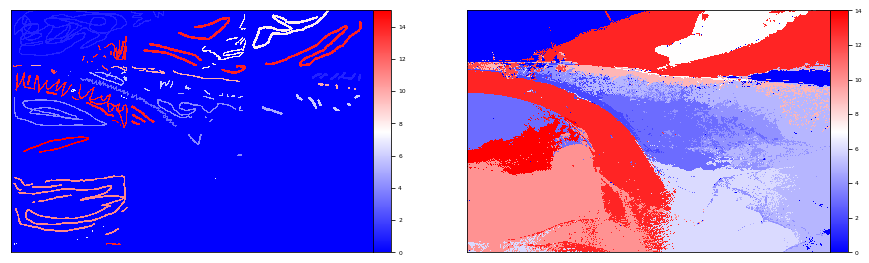

In [4]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
im2 = ax1.imshow(dat['sparse'], cmap='bwr')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%")
cb=plt.colorbar(im2, cax=cax)
cb.ax.tick_params(labelsize=6)

ax1 = fig.add_subplot(122)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
im2 = ax1.imshow(dat['class'], cmap='bwr')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%")
cb=plt.colorbar(im2, cax=cax)
cb.ax.tick_params(labelsize=6)  

## How does this work?

Image pixels and associated labels are mapped to a computational graph

![](figs/Picture11.png)

The joint probability of the image features given the labels is modelled as the product of two functions (called potentials) that are minimized using optimization techniques

![](figs/Picture12.png)

Our annotations are one potential - the computational cost of assigning a given label to a given node

![](figs/Picture13.png)

The other (pairwise) potentials are the cost of simultaneously assigning label yi to node i and label yj to node j

![](figs/Picture14.png)

And this is all solved simultaneously using an iterative algorithm